<a href="https://colab.research.google.com/github/aryan2006-saini/Machine_learning_4thSem/blob/main/Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Applying Machine Learning Concepts on <b style="color:red">Medical Cost Personal Datasets</b></h2>
<h3><a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">Click Here</a> to see the dataset on Kaggle.</h3>

In [32]:
import pandas as pd
import seaborn as sns

In [33]:
insurance_data = pd.read_csv('insurance.csv')

In [34]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

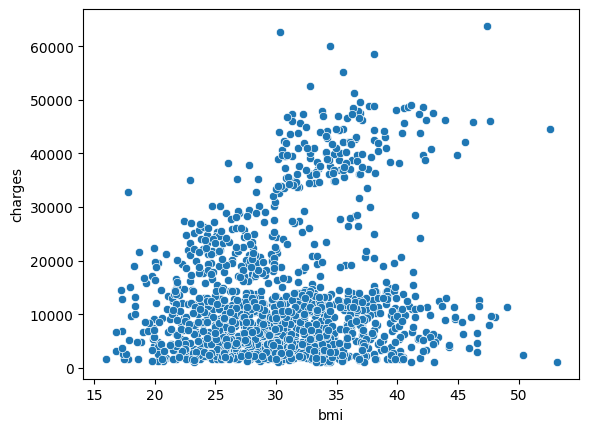

In [35]:
#let's check some relationship
# check how many charges spent on bmi value

#scatter plot visualization

sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

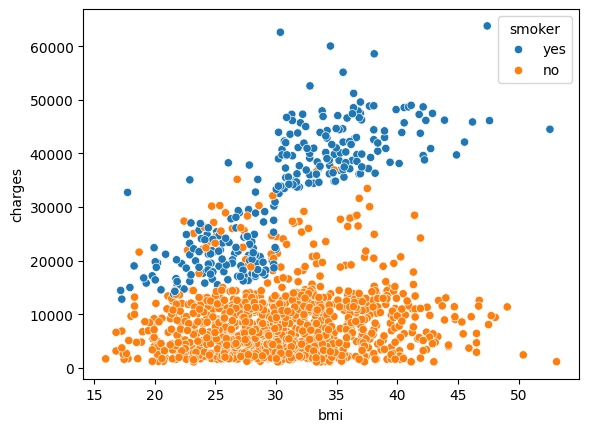

In [36]:
# let's get some ideas from graph

sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

Blue lines means company has to spent more charges.
And orange means relatively low charges.

In [37]:
#input features
x= insurance_data.drop(['charges', 'region'], axis=1)

#output features
y= insurance_data['charges']

In [38]:
x.head()

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no


In [39]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [40]:
#Now map the values to non-numerical values

x['sex']= x['sex'].map({'female': 1, 'male': 0})

x['smoker']= x['smoker'].map({'yes': 1, 'no': 0})

In [41]:
x.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [42]:
# Train Test split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# test_size=0.2 means ---> 80% data for training and 20% for testing

In [43]:
x_train.head()

,age,sex,bmi,children,smoker
560,46,1,19.95,2,0
1285,47,1,24.32,0,0
1142,52,1,24.86,0,0
969,39,1,34.32,5,0
486,54,1,21.47,3,0


In [44]:
x_test.head()

,age,sex,bmi,children,smoker
764,45,1,25.175,2,0
887,36,1,30.020,0,0
890,64,1,26.885,0,1
1293,46,0,25.745,3,0
259,19,0,31.920,0,1


In [45]:
# train the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
#Predict the values

y_pred = model.predict(x_test)

In [47]:
print(y_pred)

[ 8554.81711589  6973.58746745 36798.60416104  9417.88282303
 26871.68031081 11097.38383938   145.27608963 16746.1683771
   747.53414191 11153.67590722 28518.15016561  9292.18345421
  5460.51975119 38510.48013003 40359.30938604 37223.40538064
 15316.56711945 36047.50032223  9326.29049907 31400.1559532
  4269.64414373 10464.66374097  2719.9260555   6579.53742551
 11232.00255515 12472.06793446 14807.11281089  6066.19283362
  9535.69029723  2377.6983797   9475.05690885 12963.23366722
  4706.09057393  3414.674504    4815.64981654 12484.17176954
  2359.13614479  9161.02061228 33238.67621442 32743.41702445
  4274.58967205  4229.5442107  14435.36485176 11384.66898976
  8925.70468583 12480.09178788  5154.45787816  3554.10047649
 35649.60942684  9276.25523701 15971.35991397  2552.75200479
 12162.99980138  1062.65132285 13551.43771934 12103.65505529
  3929.66908369 32047.27892811 13637.90785926 12401.6930749
 14497.45910305 10576.37158212 16665.52678986  7721.37886148
 11366.73201797  4006.31579

We can check compare the predicted values with our test value. It is near to that values.

In [48]:
print(y_test)

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64


In [49]:
# Evaluation

from sklearn.metrics import r2_score

r2=r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7811302113434095


## R-squared (R²)

The formula for R² is:

$$
1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$


## Adjusted R-squared

The formula for Adjusted R² is:

$$
1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}
$$


In [50]:
#Adjusted R2
n=x_test.shape[0]  #//number of rows

p=x_test.shape[1]  #//number of features

adjusted_r2= 1-((1-r2)*(n-1)/(n-p-1))

print("Adjusted R-Score:", adjusted_r2)
print("R2-Score:", r2)

Adjusted R-Score: 0.7769533069797342
R2-Score: 0.7811302113434095
